# Modelisation des emissions de CO2

## Import des librairies et du dataset

In [ ]:
!pip install shap
!pip install lime
import shap
import lime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from pandas import get_dummies
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from lime import lime_tabular
from sklearn.dummy import DummyRegressor

In [ ]:
## Import du dataset

%cd "Chemin vers Dataset"

df_Building_energy = pd.read_csv("df_Building_energy.csv", sep=',')

C:\Users\33769\OneDrive\Bureau\DataScientist\Projets\Projet_4


## Informations et decription du dataset

In [ ]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 60)

In [ ]:
df_Building_energy 

,Unnamed: 0,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,5,Nonresidential COS,Other,West Precinct,810 Virginia St,98101.0,7,DOWNTOWN,47.61623,-122.33657,1999,2,97288,37198,60090,Police Station,88830.0,no secondary use,NaN,no tertiary use,NaN,NaN,136.100006,141.600006,316.299988,320.500000,1.208662e+07,1.258171e+07,0.000,7.371434e+06,4.715182e+06,False,non outlier,301.81,3.10
1,7,NonResidential,Other,Paramount Theatre,911 Pine St,98101.0,7,DOWNTOWN,47.61327,-122.33136,1926,8,102761,0,102761,Other - Entertainment/Public Assembly,102761.0,no secondary use,NaN,no tertiary use,NaN,NaN,61.299999,68.800003,141.699997,152.300003,6.298132e+06,7.067882e+06,2276286.500,3.636655e+06,3.851890e+05,False,non outlier,221.51,2.16
2,15,Nonresidential COS,Other,The Seattle Public Library - Central Library,1000 Fourth Avenue,98154.0,7,DOWNTOWN,47.60649,-122.33297,2004,11,412000,57000,355000,Library,364913.0,Parking,49000.0,Data Center,1074.0,NaN,50.799999,51.099998,155.600006,156.000000,1.858886e+07,1.870691e+07,737559.500,1.785130e+07,0.000000e+00,False,non outlier,181.38,0.44
3,16,NonResidential,Other,Downtown Seattle YMCA,909 4th Avenue,98104.0,7,DOWNTOWN,47.60546,-122.33279,1930,6,103911,0,103911,Fitness Center/Health Club/Gym,90000.0,Office,40000.0,Swimming Pool,0.0,NaN,76.599998,78.400002,157.399994,159.600006,9.956396e+06,1.019212e+07,4592347.500,4.453868e+06,9.101800e+05,False,non outlier,433.86,4.18
4,18,NonResidential,Mixed Use Property,The Rainier Club,820 4th Ave.,98104.0,7,DOWNTOWN,47.60515,-122.33159,1907,5,57452,0,57452,Social/Meeting Hall,16442.0,Restaurant,15505.0,Office,9741.0,NaN,132.399994,137.100006,280.700012,285.000000,7.606084e+06,7.877219e+06,1776201.875,3.764791e+06,2.065091e+06,False,non outlier,273.02,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,3371,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,98108.0,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1,12294,0,12294,Office,12294.0,no secondary use,NaN,no tertiary use,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.000,5.242709e+05,3.254750e+05,True,non outlier,20.94,1.70
1509,3372,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,98104.0,2,DOWNTOWN,47.59625,-122.32283,2004,1,16000,0,16000,Other - Recreation,16000.0,no secondary use,NaN,no tertiary use,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.000,3.965461e+05,5.537300e+05,False,non outlier,32.17,2.01
1510,3373,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,98101.0,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1,13157,0,13157,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.000,1.792159e+06,3.973739e+06,False,non outlier,223.54,16.99
1511,3374,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,98108.0,1,GREATER DUWAMISH,47.52832,-122.32431,1989,1,14101,0,14101,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.000,3.488702e+05,3.706010e+05,False,non outlier,22.11,1.57


In [ ]:
del df_Building_energy["Unnamed: 0"]

In [ ]:
df_Building_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1513 non-null   object 
 1   PrimaryPropertyType              1513 non-null   object 
 2   PropertyName                     1513 non-null   object 
 3   Address                          1513 non-null   object 
 4   ZipCode                          1513 non-null   float64
 5   CouncilDistrictCode              1513 non-null   int64  
 6   Neighborhood                     1513 non-null   object 
 7   Latitude                         1513 non-null   float64
 8   Longitude                        1513 non-null   float64
 9   YearBuilt                        1513 non-null   int64  
 10  NumberofFloors                   1513 non-null   int64  
 11  PropertyGFATotal                 1513 non-null   int64  
 12  PropertyGFAParking  

In [ ]:
df_Building_energy.describe()

,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1.513000e+03,1513.000000,1.513000e+03,1.508000e+03,771.000000,307.000000,973.000000,1510.000000,1510.000000,1511.000000,1511.000000,1.511000e+03,1.510000e+03,1.511000e+03,1.511000e+03,1.511000e+03,1511.000000,1511.000000
mean,98117.202247,4.256444,47.614898,-122.333016,1961.851289,3.832783,1.165883e+05,12389.051553,1.041992e+05,9.769449e+04,36431.464717,14283.369377,65.985612,71.785497,74.182782,177.380477,179.487359,8.348372e+06,7.910338e+06,4.765359e+05,5.914067e+06,1.837612e+06,175.607737,1.552052
std,18.101531,2.195248,0.049130,0.025116,32.220096,6.447011,3.057704e+05,42659.059222,2.931479e+05,2.870274e+05,69786.917579,37104.179235,28.500953,76.636822,77.596503,193.728032,193.667963,3.148852e+07,2.275073e+07,5.675696e+06,2.169826e+07,9.718641e+06,777.388349,2.374095
min,98006.000000,1.000000,47.499170,-122.411820,1900.000000,0.000000,1.128500e+04,0.000000,1.092500e+04,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000
25%,98105.000000,2.000000,47.582170,-122.343380,1931.000000,1.000000,2.884100e+04,0.000000,2.793300e+04,2.508025e+04,5045.500000,2583.500000,49.000000,32.349999,34.500000,74.000000,77.099998,1.158892e+06,1.233055e+06,0.000000e+00,6.956805e+05,0.000000e+00,18.750000,0.330000
50%,98114.000000,4.000000,47.611660,-122.332820,1965.000000,2.000000,4.736800e+04,0.000000,4.568000e+04,4.219000e+04,11520.000000,5931.000000,75.000000,50.049999,52.450001,126.000000,130.399994,2.371575e+06,2.498229e+06,0.000000e+00,1.537923e+06,3.991220e+05,46.460000,0.800000
75%,98125.000000,7.000000,47.649130,-122.321570,1988.000000,4.000000,9.944000e+04,0.000000,9.243700e+04,8.811825e+04,30232.500000,12379.500000,89.000000,78.375002,82.475000,204.050003,205.000000,6.553759e+06,6.768524e+06,0.000000e+00,4.788646e+06,1.265570e+06,123.560000,1.705000
max,98199.000000,7.000000,47.733870,-122.258640,2015.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000


### Creation d'une feature % of energy from SteamUse, Electricity and Natural Gas

In [ ]:
df_Building_energy["part_SteamUse"] = df_Building_energy["SteamUse(kBtu)"]/(df_Building_energy["SteamUse(kBtu)"]
                                                                            +df_Building_energy["Electricity(kBtu)"]
                                                                            +df_Building_energy["NaturalGas(kBtu)"])

df_Building_energy["part_NaturalGas"] = df_Building_energy["NaturalGas(kBtu)"]/(df_Building_energy["SteamUse(kBtu)"]
                                                                            +df_Building_energy["Electricity(kBtu)"]
                                                                            +df_Building_energy["NaturalGas(kBtu)"])

df_Building_energy["part_Electricity"]  = df_Building_energy["Electricity(kBtu)"]/(df_Building_energy["SteamUse(kBtu)"]
                                                                            +df_Building_energy["Electricity(kBtu)"]
                                                                            +df_Building_energy["NaturalGas(kBtu)"])

In [ ]:
df_Building_energy

,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,part_SteamUse,part_NaturalGas,part_Electricity
0,Nonresidential COS,Other,West Precinct,810 Virginia St,98101.0,7,DOWNTOWN,47.61623,-122.33657,1999,2,97288,37198,60090,Police Station,88830.0,no secondary use,NaN,no tertiary use,NaN,NaN,136.100006,141.600006,316.299988,320.500000,1.208662e+07,1.258171e+07,0.000,7.371434e+06,4.715182e+06,False,non outlier,301.81,3.10,0.000000,0.390116,0.609884
1,NonResidential,Other,Paramount Theatre,911 Pine St,98101.0,7,DOWNTOWN,47.61327,-122.33136,1926,8,102761,0,102761,Other - Entertainment/Public Assembly,102761.0,no secondary use,NaN,no tertiary use,NaN,NaN,61.299999,68.800003,141.699997,152.300003,6.298132e+06,7.067882e+06,2276286.500,3.636655e+06,3.851890e+05,False,non outlier,221.51,2.16,0.361423,0.061159,0.577418
2,Nonresidential COS,Other,The Seattle Public Library - Central Library,1000 Fourth Avenue,98154.0,7,DOWNTOWN,47.60649,-122.33297,2004,11,412000,57000,355000,Library,364913.0,Parking,49000.0,Data Center,1074.0,NaN,50.799999,51.099998,155.600006,156.000000,1.858886e+07,1.870691e+07,737559.500,1.785130e+07,0.000000e+00,False,non outlier,181.38,0.44,0.039678,0.000000,0.960322
3,NonResidential,Other,Downtown Seattle YMCA,909 4th Avenue,98104.0,7,DOWNTOWN,47.60546,-122.33279,1930,6,103911,0,103911,Fitness Center/Health Club/Gym,90000.0,Office,40000.0,Swimming Pool,0.0,NaN,76.599998,78.400002,157.399994,159.600006,9.956396e+06,1.019212e+07,4592347.500,4.453868e+06,9.101800e+05,False,non outlier,433.86,4.18,0.461246,0.091417,0.447337
4,NonResidential,Mixed Use Property,The Rainier Club,820 4th Ave.,98104.0,7,DOWNTOWN,47.60515,-122.33159,1907,5,57452,0,57452,Social/Meeting Hall,16442.0,Restaurant,15505.0,Office,9741.0,NaN,132.399994,137.100006,280.700012,285.000000,7.606084e+06,7.877219e+06,1776201.875,3.764791e+06,2.065091e+06,False,non outlier,273.02,4.75,0.233524,0.271505,0.494971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,98108.0,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1,12294,0,12294,Office,12294.0,no secondary use,NaN,no tertiary use,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.000,5.242709e+05,3.254750e+05,True,non outlier,20.94,1.70,0.000000,0.383026,0.616974
1509,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,98104.0,2,DOWNTOWN,47.59625,-122.32283,2004,1,16000,0,16000,Other - Recreation,16000.0,no secondary use,NaN,no tertiary use,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.000,3.965461e+05,5.537300e+05,False,non outlier,32.17,2.01,0.000000,0.582704,0.417296
1510,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,98101.0,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1,13157,0,13157,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.000,1.792159e+06,3.973739e+06,False,non outlier,223.54,16.99,0.000000,0.689180,0.310820
1511,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,98108.0,1,GREATER DUWAMISH,47.52832,-122.32431,1989,1,14101,0,14101,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,51.000000,55.500000,105.30000

## Préparation du dataset pour modelisation

In [ ]:
df_modelisation = df_Building_energy.copy()

# supression des colonnes non utilisées pour la modelisation

del df_modelisation["BuildingType"]
del df_modelisation["PropertyName"]
del df_modelisation["Address"]
del df_modelisation["DefaultData"]
del df_modelisation["ENERGYSTARScore"]
del df_modelisation["SteamUse(kBtu)"]
del df_modelisation["NaturalGas(kBtu)"]
del df_modelisation["Electricity(kBtu)"]
del df_modelisation["SiteEUI(kBtu/sf)"]
del df_modelisation['SiteEUIWN(kBtu/sf)']
del df_modelisation['SourceEUI(kBtu/sf)']
del df_modelisation['SourceEUIWN(kBtu/sf)']
del df_modelisation['SiteEnergyUse(kBtu)']


# imputation des Nan des aires des usages secondaires et tertiaires par 0

df_modelisation['ThirdLargestPropertyUseTypeGFA'] = df_modelisation['ThirdLargestPropertyUseTypeGFA'].fillna(0)
df_modelisation['SecondLargestPropertyUseTypeGFA'] = df_modelisation['SecondLargestPropertyUseTypeGFA'].fillna(0)

In [ ]:
df_modelisation.columns

Index(['PrimaryPropertyType', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'SiteEnergyUseWN(kBtu)', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'part_SteamUse', 'part_NaturalGas',
       'part_Electricity'],
      dtype='object')

### suppression des outliers

In [ ]:
df_modelisation["Outlier"].value_counts()

non outlier     1498
Low outlier       13
High outlier       2
Name: Outlier, dtype: int64

In [ ]:
df_modelisation[df_modelisation["Outlier"]=="Low outlier"]

,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),Outlier,TotalGHGEmissions,GHGEmissionsIntensity,part_SteamUse,part_NaturalGas,part_Electricity
320,Retail Store,98105.0,4,NORTHEAST,47.66178,-122.31812,1987,2,69492,0,69492,Retail Store,69800.0,Other,0.0,no tertiary use,0.0,3.189628e+05,Low outlier,2.22,0.03,0.0,0.000000,1.000000
383,Large Office,98104.0,2,DOWNTOWN,47.59878,-122.33458,1913,7,154159,0,154159,Office,193154.0,no secondary use,0.0,no tertiary use,0.0,1.134876e+07,Low outlier,29.43,0.19,0.0,0.175759,0.824241
628,K-12 School,98109.0,7,MAGNOLIA / QUEEN ANNE,47.63203,-122.35337,2001,1,35805,0,35805,K-12 School,35805.0,no secondary use,0.0,no tertiary use,0.0,4.314717e+05,Low outlier,11.54,0.32,0.0,0.428403,0.571597
693,Retail Store,98134.0,2,GREATER DUWAMISH,47.56535,-122.34054,1953,1,39900,0,39900,Retail Store,25000.0,Non-Refrigerated Warehouse,15000.0,no tertiary use,0.0,1.454688e+05,Low outlier,5.46,0.14,0.0,0.663124,0.336876
775,Small- and Mid-Sized Office,98101.0,7,DOWNTOWN,47.61119,-122.33581,1903,3,57720,0,57720,Office,25000.0,no secondary use,0.0,no tertiary use,0.0,2.410550e+04,Low outlier,0.17,0.00,0.0,0.000000,1.000000
817,Other,98101.0,7,DOWNTOWN,47.60711,-122.33886,1900,3,49760,0,49760,Other,24019.0,no secondary use,0.0,no tertiary use,0.0,4.429350e+04,Low outlier,0.31,0.01,0.0,0.000000,1.000000
932,Worship Facility,98126.0,1,SOUTHWEST,47.51709,-122.37797,1971,1,23772,0,23772,Worship Facility,23772.0,no secondary use,0.0,no tertiary use,0.0,1.008417e+05,Low outlier,0.70,0.03,0.0,0.000000,1.000000
1027,Small- and Mid-Sized Office,98133.0,3,CENTRAL,47.59973,-122.31331,1947,1,45068,0,45068,Office,45068.0,no secondary use,0.0,no tertiary use,0.0,3.092140e+05,Low outlier,8.59,0.19,0.0,0.502263,0.497737
1131,K-12 School,98122.0,3,CENTRAL,47.60885,-122.29990,1929,2,24152,0,24152,K-12 School,24152.0,no secondary use,0.0,no tertiary use,0.0,1.613634e+05,Low outlier,1.12,0.05,0.0,0.000000,1.000000
1166,Other,98134.0,2,GREATER DUWAMISH,47.58788,-122.33458,1910,3,27690,0,27690,Other,24717.0,Parking,0.0,no tertiary use,0.0,1.726000e+04,Low outlier,0.12,0.00,0.0,0.000000,1.000000


In [ ]:
df_modelisation[df_modelisation["Outlier"]=="High outlier"]

,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),Outlier,TotalGHGEmissions,GHGEmissionsIntensity,part_SteamUse,part_NaturalGas,part_Electricity
167,Large Office,98101.0,7,DOWNTOWN,47.60642,-122.33581,1958,6,172842,25920,146922,Office,99890.0,Data Center,39336.0,Parking,25000.0,41650404.0,High outlier,362.66,2.10,0.0,0.038765,0.961235
445,Large Office,98119.0,7,MAGNOLIA / QUEEN ANNE,47.62235,-122.36378,2000,4,129551,42500,87051,Office,82273.0,Parking,42500.0,Data Center,4778.0,27137190.0,High outlier,189.18,1.46,0.0,0.000000,1.000000


In [ ]:
df_modelisation.drop(df_modelisation.loc[df_modelisation['Outlier']=='Low outlier'].index, inplace=True)
df_modelisation.drop(df_modelisation.loc[df_modelisation['Outlier']=='High outlier'].index, inplace=True)
del df_modelisation['Outlier']

## Preprocessing

### Encodage variables qualitatives

Il ne s'agit que de variables ordinales, nous utiliserons ordinalencoder ou onehotencoder, sauf pour les etages ou nous créerons 4 categories  :0 etage (terrain) 1,2 etages(maison), 2 à 5 étages(petit immeuble) et 6 etages et au dessus(immeuble).

In [ ]:
df_modelisation.columns

Index(['PrimaryPropertyType', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'part_SteamUse', 'part_NaturalGas', 'part_Electricity'],
      dtype='object')

In [ ]:
# création des 3 classes de batiments par étage

In [ ]:
df_modelisation['NumberofFloors'].unique()

array([ 2,  8, 11,  6,  5, 10, 19,  7,  1,  3, 12,  4, 15, 25, 33, 23, 17,
       20, 36, 16, 22, 47, 41, 29, 34, 14, 49, 37, 42, 63, 13, 18, 24, 21,
       55, 46, 30, 56,  9,  0, 76, 27, 99], dtype=int64)

In [ ]:
df_modelisation['NumberofFloorsClass'] = df_modelisation['NumberofFloors']


In [ ]:
classes = {range(1, 2): 1, range(3, 5): 2, range(6, 1000): 3}

df_modelisation['NumberofFloorsClass'] = df_modelisation['NumberofFloors'].apply(lambda x: next((v for k, v in classes.items() if x in k), 0))

In [ ]:
df_modelisation['NumberofFloorsClass'].unique()

array([0, 3, 1, 2], dtype=int64)

In [ ]:
df_modelisation[['NumberofFloorsClass', 'NumberofFloors']].head(20)

,NumberofFloorsClass,NumberofFloors
0,0,2
1,3,8
2,3,11
3,3,6
4,0,5
5,3,10
6,3,19
7,0,2
8,3,7
9,0,2


In [ ]:
encodcol = ['PrimaryPropertyType',
             'ZipCode',
            'CouncilDistrictCode',
             'Neighborhood',
             'LargestPropertyUseType',
             'SecondLargestPropertyUseType',
             'ThirdLargestPropertyUseType',
             "NumberofFloorsClass"]

In [ ]:
def encodage(df):
#    df['ZipCode'] = df['ZipCode'].astype(object)
    for col in encodcol:
        #df = pd.get_dummies(df, columns = None)
        df = pd.get_dummies(df, columns =encodcol)
        return df

In [ ]:
df_modelisation

,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,part_SteamUse,part_NaturalGas,part_Electricity,NumberofFloorsClass
0,Other,98101.0,7,DOWNTOWN,47.61623,-122.33657,1999,2,97288,37198,60090,Police Station,88830.0,no secondary use,0.0,no tertiary use,0.0,1.258171e+07,301.81,3.10,0.000000,0.390116,0.609884,0
1,Other,98101.0,7,DOWNTOWN,47.61327,-122.33136,1926,8,102761,0,102761,Other - Entertainment/Public Assembly,102761.0,no secondary use,0.0,no tertiary use,0.0,7.067882e+06,221.51,2.16,0.361423,0.061159,0.577418,3
2,Other,98154.0,7,DOWNTOWN,47.60649,-122.33297,2004,11,412000,57000,355000,Library,364913.0,Parking,49000.0,Data Center,1074.0,1.870691e+07,181.38,0.44,0.039678,0.000000,0.960322,3
3,Other,98104.0,7,DOWNTOWN,47.60546,-122.33279,1930,6,103911,0,103911,Fitness Center/Health Club/Gym,90000.0,Office,40000.0,Swimming Pool,0.0,1.019212e+07,433.86,4.18,0.461246,0.091417,0.447337,3
4,Mixed Use Property,98104.0,7,DOWNTOWN,47.60515,-122.33159,1907,5,57452,0,57452,Social/Meeting Hall,16442.0,Restaurant,15505.0,Office,9741.0,7.877219e+06,273.02,4.75,0.233524,0.271505,0.494971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,Office,98108.0,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1,12294,0,12294,Office,12294.0,no secondary use,0.0,no tertiary use,0.0,9.430032e+05,20.94,1.70,0.000000,0.383026,0.616974,1
1509,Other,98104.0,2,DOWNTOWN,47.59625,-122.32283,2004,1,16000,0,16000,Other - Recreation,16000.0,no secondary use,0.0,no tertiary use,0.0,1.053706e+06,32.17,2.01,0.000000,0.582704,0.417296,1
1510,Other,98101.0,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1,13157,0,13157,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,6.053764e+06,223.54,16.99,0.000000,0.689180,0.310820,1
1511,Mixed Use Property,98108.0,1,GREATER DUWAMISH,47.52832,-122.32431,1989,1,14101,0,14101,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,7.828413e+05,22.11,1.57,0.000000,0.515102,0.484898,1


In [ ]:
def imputation(df):
    return df.dropna(axis=0)

In [ ]:
scaler = StandardScaler()
df_modelisation[["Latitude",
                 "Longitude",
                 "YearBuilt",
                 "PropertyGFATotal",
                "PropertyGFAParking",
                "PropertyGFABuilding(s)",
                "LargestPropertyUseTypeGFA",
                "SecondLargestPropertyUseTypeGFA",
                "ThirdLargestPropertyUseTypeGFA"]] = scaler.fit_transform(df_modelisation[["Latitude",
                 "Longitude",
                 "YearBuilt",
                 "PropertyGFATotal",
                "PropertyGFAParking",
                "PropertyGFABuilding(s)",
                "LargestPropertyUseTypeGFA",
                "SecondLargestPropertyUseTypeGFA",
                "ThirdLargestPropertyUseTypeGFA"]])

In [ ]:
df_modelisation

,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,part_SteamUse,part_NaturalGas,part_Electricity,NumberofFloorsClass
0,Other,98101.0,7,DOWNTOWN,0.024120,-0.140986,1.150325,2,-0.064669,0.577361,-0.151439,Police Station,-0.032403,no secondary use,-0.350952,no tertiary use,-0.164032,1.258171e+07,301.81,3.10,0.000000,0.390116,0.609884,0
1,Other,98101.0,7,DOWNTOWN,-0.036051,0.066406,-1.121817,8,-0.046847,-0.291065,-0.006520,Other - Entertainment/Public Assembly,0.015919,no secondary use,-0.350952,no tertiary use,-0.164032,7.067882e+06,221.51,2.16,0.361423,0.061159,0.577418,3
2,Other,98154.0,7,DOWNTOWN,-0.173874,0.002317,1.305951,11,0.960097,1.039659,0.850137,Library,0.925237,Parking,0.569337,Data Center,-0.103437,1.870691e+07,181.38,0.44,0.039678,0.000000,0.960322,3
3,Other,98104.0,7,DOWNTOWN,-0.194811,0.009483,-0.997317,6,-0.043103,-0.291065,-0.002614,Fitness Center/Health Club/Gym,-0.028345,Office,0.400304,Swimming Pool,-0.164032,1.019212e+07,433.86,4.18,0.461246,0.091417,0.447337,3
4,Mixed Use Property,98104.0,7,DOWNTOWN,-0.201113,0.057251,-1.713197,5,-0.194383,-0.291065,-0.160399,Social/Meeting Hall,-0.283494,Restaurant,-0.059746,Office,0.385552,7.877219e+06,273.02,4.75,0.233524,0.271505,0.494971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,Office,98108.0,2,GREATER DUWAMISH,-0.972149,0.855372,0.870198,1,-0.341426,-0.291065,-0.313765,Office,-0.297882,no secondary use,-0.350952,no tertiary use,-0.164032,9.430032e+05,20.94,1.70,0.000000,0.383026,0.616974,1
1509,Other,98104.0,2,DOWNTOWN,-0.382031,0.405956,1.305951,1,-0.329359,-0.291065,-0.301178,Other - Recreation,-0.285027,no secondary use,-0.350952,no tertiary use,-0.164032,1.053706e+06,32.17,2.01,0.000000,0.582704,0.417296,1
1510,Other,98101.0,7,MAGNOLIA / QUEEN ANNE,0.434945,-0.987671,0.372194,1,-0.338616,-0.291065,-0.310834,Other - Recreation,-0.314222,Fitness Center/Health Club/Gym,-0.246264,Swimming Pool,-0.164032,6.053764e+06,223.54,16.99,0.000000,0.689180,0.310820,1
1511,Mixed Use Property,98108.0,1,GREATER DUWAMISH,-1.762902,0.347042,0.839072,1,-0.335542,-0.291065,-0.307628,Other - Recreation,-0.317629,Fitness Center/Health Club/Gym,-0.228854,Pre-school/Daycare,-0.136725,7.828413e+05,22.11,1.57,0.000000,0.515102,0.484898,1


In [ ]:
def preprocessing_CO2(df):
    df = encodage(df)
    df = imputation(df)
    X = df.drop(["TotalGHGEmissions","GHGEmissionsIntensity", 'NumberofFloors', 'SiteEnergyUseWN(kBtu)'], axis=1)
    y = df["TotalGHGEmissions"]
    return X,y

In [ ]:
def preprocessing_energy(df):
    df = encodage(df)
    df = imputation(df)
    X = df.drop(["TotalGHGEmissions","GHGEmissionsIntensity", 'NumberofFloors', 'SiteEnergyUseWN(kBtu)'], axis=1)
    y = df['SiteEnergyUseWN(kBtu)']
    return X,y

In [ ]:
df_modelisation

,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,part_SteamUse,part_NaturalGas,part_Electricity,NumberofFloorsClass
0,Other,98101.0,7,DOWNTOWN,0.024120,-0.140986,1.150325,2,-0.064669,0.577361,-0.151439,Police Station,-0.032403,no secondary use,-0.350952,no tertiary use,-0.164032,1.258171e+07,301.81,3.10,0.000000,0.390116,0.609884,0
1,Other,98101.0,7,DOWNTOWN,-0.036051,0.066406,-1.121817,8,-0.046847,-0.291065,-0.006520,Other - Entertainment/Public Assembly,0.015919,no secondary use,-0.350952,no tertiary use,-0.164032,7.067882e+06,221.51,2.16,0.361423,0.061159,0.577418,3
2,Other,98154.0,7,DOWNTOWN,-0.173874,0.002317,1.305951,11,0.960097,1.039659,0.850137,Library,0.925237,Parking,0.569337,Data Center,-0.103437,1.870691e+07,181.38,0.44,0.039678,0.000000,0.960322,3
3,Other,98104.0,7,DOWNTOWN,-0.194811,0.009483,-0.997317,6,-0.043103,-0.291065,-0.002614,Fitness Center/Health Club/Gym,-0.028345,Office,0.400304,Swimming Pool,-0.164032,1.019212e+07,433.86,4.18,0.461246,0.091417,0.447337,3
4,Mixed Use Property,98104.0,7,DOWNTOWN,-0.201113,0.057251,-1.713197,5,-0.194383,-0.291065,-0.160399,Social/Meeting Hall,-0.283494,Restaurant,-0.059746,Office,0.385552,7.877219e+06,273.02,4.75,0.233524,0.271505,0.494971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,Office,98108.0,2,GREATER DUWAMISH,-0.972149,0.855372,0.870198,1,-0.341426,-0.291065,-0.313765,Office,-0.297882,no secondary use,-0.350952,no tertiary use,-0.164032,9.430032e+05,20.94,1.70,0.000000,0.383026,0.616974,1
1509,Other,98104.0,2,DOWNTOWN,-0.382031,0.405956,1.305951,1,-0.329359,-0.291065,-0.301178,Other - Recreation,-0.285027,no secondary use,-0.350952,no tertiary use,-0.164032,1.053706e+06,32.17,2.01,0.000000,0.582704,0.417296,1
1510,Other,98101.0,7,MAGNOLIA / QUEEN ANNE,0.434945,-0.987671,0.372194,1,-0.338616,-0.291065,-0.310834,Other - Recreation,-0.314222,Fitness Center/Health Club/Gym,-0.246264,Swimming Pool,-0.164032,6.053764e+06,223.54,16.99,0.000000,0.689180,0.310820,1
1511,Mixed Use Property,98108.0,1,GREATER DUWAMISH,-1.762902,0.347042,0.839072,1,-0.335542,-0.291065,-0.307628,Other - Recreation,-0.317629,Fitness Center/Health Club/Gym,-0.228854,Pre-school/Daycare,-0.136725,7.828413e+05,22.11,1.57,0.000000,0.515102,0.484898,1


In [ ]:
df_X, df_y = preprocessing_CO2(df_modelisation)

X = df_X.values
y = df_y.values


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

#trainset, testset = train_test_split(df_modelisation, test_size = 0.2, random_state = 0)

#X_train, y_train = preprocessing(trainset)
#X_test, y_test = preprocessing(testset)

**Etant donné la petite taille du dataset, la continuité de la variable target, la non normalité des données et la présence de variables qualitatives et quantitatives nous allons nous tourner vers des modeles de regression SVR et kneighbour regressor, puis randomforest regressor ou boosting**

### Prediction Energie

In [ ]:
df_X, df_y = preprocessing_CO2(df_modelisation)

X = df_X.values
y = df_y.values


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

#### K Neighbours Regressor

In [ ]:
hyper_params_KNR = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10],
                'weights':["uniform", "distance"],
                'algorithm':["auto", "ball_tree", "kd_tree", "brute"]
               }

In [ ]:
KNR_model = KNeighborsRegressor()
grid_KNR = GridSearchCV(KNR_model, hyper_params_KNR, scoring = "r2", cv = 4)

In [ ]:
%%time
grid_KNR.fit(X_train,y_train)
print(grid_KNR.best_params_)

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
Wall time: 13.9 s


In [ ]:
%%time
KNR_model = grid_KNR.best_estimator_
KNR_model.fit(X_train,y_train)

Wall time: 1.2 ms


KNeighborsRegressor(n_neighbors=1)

In [ ]:
%%time
y_pred_KNR = KNR_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred_KNR))
print(mean_squared_error(y_test, y_pred_KNR))
print(r2_score(y_test, y_pred_KNR))

213.64429530201343
1447942.1477127515
-0.15154668044699893
Wall time: 8.64 ms


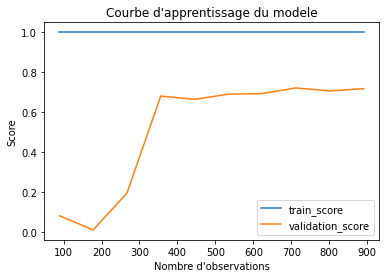

In [ ]:
N, train_score, val_score = learning_curve(KNR_model, X_train, y_train, cv=4, scoring = "r2",
                                           train_sizes = np.linspace(0.1,1,10))
plt.title("Courbe d'apprentissage du modele")
plt.plot(N, train_score.mean(axis=1), label="train_score")
plt.plot(N, val_score.mean(axis=1), label="validation_score")
plt.xlabel("Nombre d'observations")
plt.ylabel("Score")
plt.legend()

In [ ]:
pd.DataFrame(y_test, y_pred_KNR)

,0
9.30,9.13
42.45,42.25
3.58,77.04
7.52,7.69
4.58,42.87
...,...
60.20,46.51
102.54,185.39
64.81,27.97
2.15,38.39


#### Random Forest Regressor

In [ ]:
hyper_params_RFR = {'n_estimators' : [20, 50, 100, 150],
                'criterion':["squared_error", "absolute_error"]
               }

In [ ]:
RFR_model = RandomForestRegressor()
grid_RFR = GridSearchCV(RFR_model, hyper_params_RFR, scoring = "r2", cv = 4)

In [ ]:
%%time
grid_RFR.fit(X_train,y_train)

Wall time: 7min 54s


GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'n_estimators': [20, 50, 100, 150]},
             scoring='r2')

In [ ]:
%%time
RFR_model = grid_RFR.best_estimator_
RFR_model.fit(X_train,y_train)

Wall time: 29.8 s


RandomForestRegressor(criterion='absolute_error', n_estimators=50)

In [ ]:
%%time
y_pred_RFR = RFR_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred_RFR))
print(mean_squared_error(y_test, y_pred_RFR))
print(r2_score(y_test, y_pred_RFR))

142.85854932885906
822119.52028516
0.34616931621851843
Wall time: 13 ms


In [ ]:
pd.DataFrame(y_test, y_pred_RFR)

,0
27.3928,9.13
172.4810,42.25
137.7812,77.04
13.8562,7.69
53.5054,42.87
...,...
52.2192,46.51
127.2326,185.39
56.8784,27.97
21.8184,38.39


#### Support Vector Regressor

In [ ]:
hyper_params_SVR = {'gamma' : ["scale", "auto"],
                'C':[1, 10, 100, 1000, 10000, 100000]
               }

In [ ]:
SVR_model = SVR()
grid_SVR = GridSearchCV(SVR_model, hyper_params_SVR, scoring = "r2", cv = 4)

In [ ]:
%%time
grid_SVR.fit(X_train,y_train)
print(grid_SVR.best_params_)

{'C': 100000, 'gamma': 'auto'}
Wall time: 24.9 s


In [ ]:
%%time
SVR_model = grid_SVR.best_estimator_
SVR_model.fit(X_train,y_train)

Wall time: 3.46 s


SVR(C=100000, gamma='auto')

In [ ]:
%%time
y_pred_SVR = SVR_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred_SVR))
print(mean_squared_error(y_test, y_pred_SVR))
print(r2_score(y_test, y_pred_SVR))

161.44440317319024
944343.4998061043
0.24896472961904947
Wall time: 117 ms


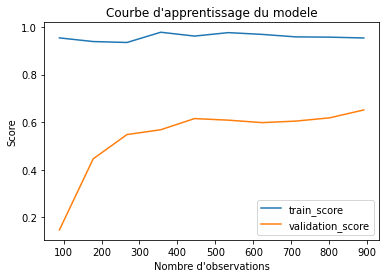

In [ ]:
N, train_score, val_score = learning_curve(SVR_model, X_train, y_train, cv=4, scoring = "r2",
                                           train_sizes = np.linspace(0.1,1,10))
plt.title("Courbe d'apprentissage du modele")
plt.plot(N, train_score.mean(axis=1), label="train_score")
plt.plot(N, val_score.mean(axis=1), label="validation_score")
plt.xlabel("Nombre d'observations")
plt.ylabel("Score")
plt.legend()

In [ ]:
pd.DataFrame(y_test, y_pred_SVR)

,0
8.320102,9.13
103.865172,42.25
65.706311,77.04
14.515094,7.69
41.985076,42.87
...,...
85.155928,46.51
139.200085,185.39
66.788869,27.97
37.188508,38.39


#### AdaBoostRegressor

In [ ]:
hyper_params_ADA = {'n_estimators' : [10,20,30,40, 50, 100, 150],
                'learning_rate':[1, 5,10]
               }

In [ ]:
ADA_model = AdaBoostRegressor()
grid_ADA = GridSearchCV(ADA_model, hyper_params_ADA, scoring = "r2", cv = 4)

In [ ]:
%%time
grid_ADA.fit(X_train,y_train)
print(grid_ADA.best_params_)

{'learning_rate': 1, 'n_estimators': 50}
Wall time: 20.9 s


In [ ]:
%%time
ADA_model = grid_ADA.best_estimator_
ADA_model.fit(X_train,y_train)

Wall time: 416 ms


AdaBoostRegressor(learning_rate=1)

In [ ]:
%%time
y_pred_ADA = ADA_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred_ADA))
print(mean_squared_error(y_test, y_pred_ADA))
print(r2_score(y_test, y_pred_ADA))

373.27617142515464
988944.2185218554
0.21349383068582595
Wall time: 12.1 ms


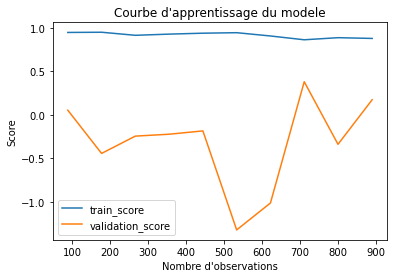

In [ ]:
N, train_score, val_score = learning_curve(ADA_model, X_train, y_train, cv=4, scoring = "r2",
                                           train_sizes = np.linspace(0.1,1,10))
plt.title("Courbe d'apprentissage du modele")
plt.plot(N, train_score.mean(axis=1), label="train_score")
plt.plot(N, val_score.mean(axis=1), label="validation_score")
plt.xlabel("Nombre d'observations")
plt.ylabel("Score")
plt.legend()

In [ ]:
pd.DataFrame(y_test, y_pred_ADA)

,0
292.165032,9.13
292.165032,42.25
320.010714,77.04
218.947247,7.69
292.165032,42.87
...,...
320.010714,46.51
815.195283,185.39
320.010714,27.97
292.165032,38.39


#### GradientBoostingRegressor

In [ ]:
hyper_params_GBR = {'n_estimators' : [10,20,30,40, 50, 100, 150],
                'learning_rate':[1, 5,10]
               }

In [ ]:
GB_model = GradientBoostingRegressor()
grid_GBR = GridSearchCV(GB_model , hyper_params_GBR, scoring = "r2", cv = 4)

In [ ]:
%%time
grid_GBR.fit(X_train,y_train)
print(grid_GBR.best_params_)

{'learning_rate': 1, 'n_estimators': 30}
Wall time: 22.8 s


overflow encountered in square


In [ ]:
%%time
GBR_model = grid_GBR.best_estimator_
GBR_model.fit(X_train,y_train)


Wall time: 203 ms


GradientBoostingRegressor(learning_rate=1, n_estimators=30)

In [ ]:
%%time
y_pred_GBR = GBR_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred_GBR))
print(mean_squared_error(y_test, y_pred_GBR))
print(r2_score(y_test, y_pred_GBR))

171.30911611766743
1148589.3201861596
0.08652826982999007
Wall time: 1.99 ms


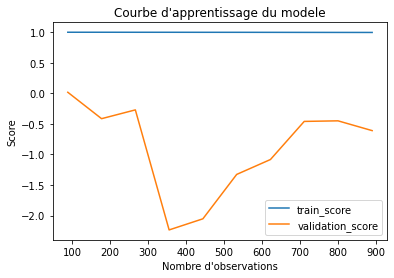

In [ ]:
N, train_score, val_score = learning_curve(GBR_model , X_train, y_train, cv=4, scoring = "r2",
                                           train_sizes = np.linspace(0.1,1,10))
plt.title("Courbe d'apprentissage du modele")
plt.plot(N, train_score.mean(axis=1), label="train_score")
plt.plot(N, val_score.mean(axis=1), label="validation_score")
plt.xlabel("Nombre d'observations")
plt.ylabel("Score")
plt.legend()

In [ ]:
pd.DataFrame(y_test, y_pred_GBR)

,0
9.361507,9.13
132.506345,42.25
84.360547,77.04
-14.824648,7.69
47.428704,42.87
...,...
57.531543,46.51
232.720738,185.39
74.246111,27.97
9.964601,38.39


#### XGBoostRegressor

In [ ]:
hyper_params_XGB = {'n_estimators' : [10,20,30,40, 50, 100, 150],
                'learning_rate':[1, 5,10]
               }

param_grid_XGB={"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],}

In [ ]:
XGB_model = xgb.XGBRegressor()
grid_XGB = GridSearchCV(XGB_model, param_grid_XGB, scoring = "r2", cv = 4)

In [ ]:
%%time
grid_XGB.fit(X_train,y_train)

Wall time: 7min 48s


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [ ]:
%%time
XGB_model = grid_XGB.best_estimator_
XGB_model.fit(X_train,y_train)

Wall time: 358 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
%%time
y_pred_XGB = XGB_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred_XGB))
print(mean_squared_error(y_test, y_pred_XGB))
print(r2_score(y_test, y_pred_XGB))

157.76182061376184
880136.1434775426
0.300028764295593
Wall time: 7.41 ms


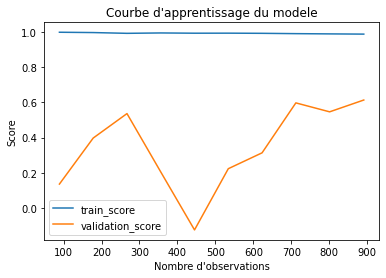

In [ ]:
N, train_score, val_score = learning_curve(XGB_model, X_train, y_train, cv=4, scoring = "r2",
                                           train_sizes = np.linspace(0.1,1,10))
plt.title("Courbe d'apprentissage du modele")
plt.plot(N, train_score.mean(axis=1), label="train_score")
plt.plot(N, val_score.mean(axis=1), label="validation_score")
plt.xlabel("Nombre d'observations")
plt.ylabel("Score")
plt.legend()

In [ ]:
pd.DataFrame(y_test, y_pred_XGB)

,0
75.298050,9.13
89.147743,42.25
70.340332,77.04
-5.417131,7.69
92.743652,42.87
...,...
73.188889,46.51
154.505768,185.39
68.607300,27.97
51.650475,38.39


In [ ]:
pd.DataFrame(y_test).describe()

,0
count,298.000000
mean,213.212617
std,1123.219769
min,0.680000
25%,21.265000
50%,46.725000
75%,123.235000
max,16870.980000


In [ ]:
print("KNR MAE :" + str(mean_absolute_error(y_test, y_pred_KNR)))
print("KNR MSE :" +str(mean_squared_error(y_test, y_pred_KNR)))
print("KNR R2" +str(r2_score(y_test, y_pred_KNR)))

print("RFR MAE :" + str(mean_absolute_error(y_test, y_pred_RFR)))
print("RFR MSE :" +str(mean_squared_error(y_test, y_pred_RFR)))
print("RFR R2 :" +str(r2_score(y_test, y_pred_RFR)))

print("SVR MAE :" + str(mean_absolute_error(y_test, y_pred_SVR)))
print("SVR MSE :" +str(mean_squared_error(y_test, y_pred_SVR)))
print("SVR R2 :" +str(r2_score(y_test, y_pred_SVR)))

print("ADA MAE :" + str(mean_absolute_error(y_test, y_pred_ADA)))
print("ADA MSE :" +str(mean_squared_error(y_test, y_pred_ADA)))
print("ADA R2" +str(r2_score(y_test, y_pred_ADA)))

print("GB MAE :" + str(mean_absolute_error(y_test, y_pred_GBR)))
print("GB MSE :" +str(mean_squared_error(y_test, y_pred_GBR)))
print("GB R2 :" +str(r2_score(y_test, y_pred_GBR)))

print("XGB MAE :" + str(mean_absolute_error(y_test, y_pred_XGB)))
print("XGB MSE :" +str(mean_squared_error(y_test, y_pred_XGB)))
print("XGB R2 :" +str(r2_score(y_test, y_pred_XGB)))

KNR MAE :213.64429530201343
KNR MSE :1447942.1477127515
KNR R2-0.15154668044699893
RFR MAE :142.85854932885906
RFR MSE :822119.52028516
RFR R2 :0.34616931621851843
SVR MAE :161.44440317319024
SVR MSE :944343.4998061043
SVR R2 :0.24896472961904947
ADA MAE :373.27617142515464
ADA MSE :988944.2185218554
ADA R20.21349383068582595
GB MAE :171.30911611766743
GB MSE :1148589.3201861596
GB R2 :0.08652826982999007
XGB MAE :157.76182061376184
XGB MSE :880136.1434775426
XGB R2 :0.300028764295593


**Le modele donnant les meilleurs resultats est le modele de randomforestregressor**

### Integration de l'Energy star score dans la modelisation

In [ ]:
df_modelisation = df_Building_energy.copy()

# supression des colonnes non utilisées pour la modelisation

del df_modelisation["BuildingType"]
del df_modelisation["PropertyName"]
del df_modelisation["Address"]
del df_modelisation["DefaultData"]
del df_modelisation["SteamUse(kBtu)"]
del df_modelisation["NaturalGas(kBtu)"]
del df_modelisation["Electricity(kBtu)"]
del df_modelisation["SiteEUI(kBtu/sf)"]
del df_modelisation['SiteEUIWN(kBtu/sf)']
del df_modelisation['SourceEUI(kBtu/sf)']
del df_modelisation['SourceEUIWN(kBtu/sf)']
del df_modelisation['SiteEnergyUse(kBtu)']


# imputation des Nan des aires des usages secondaires et tertiaires par 0

df_modelisation['ThirdLargestPropertyUseTypeGFA'] = df_modelisation['ThirdLargestPropertyUseTypeGFA'].fillna(0)
df_modelisation['SecondLargestPropertyUseTypeGFA'] = df_modelisation['SecondLargestPropertyUseTypeGFA'].fillna(0)

In [ ]:
df_modelisation.columns

Index(['PrimaryPropertyType', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'Outlier',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'part_SteamUse',
       'part_NaturalGas', 'part_Electricity'],
      dtype='object')

**Suppression des outliers**

In [ ]:
df_modelisation["Outlier"].value_counts()

non outlier     1498
Low outlier       13
High outlier       2
Name: Outlier, dtype: int64

In [ ]:
df_modelisation[df_modelisation["Outlier"]=="Low outlier"]

,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),Outlier,TotalGHGEmissions,GHGEmissionsIntensity,part_SteamUse,part_NaturalGas,part_Electricity
320,Retail Store,98105.0,4,NORTHEAST,47.66178,-122.31812,1987,2,69492,0,69492,Retail Store,69800.0,Other,0.0,no tertiary use,0.0,100.0,3.189628e+05,Low outlier,2.22,0.03,0.0,0.000000,1.000000
383,Large Office,98104.0,2,DOWNTOWN,47.59878,-122.33458,1913,7,154159,0,154159,Office,193154.0,no secondary use,0.0,no tertiary use,0.0,100.0,1.134876e+07,Low outlier,29.43,0.19,0.0,0.175759,0.824241
628,K-12 School,98109.0,7,MAGNOLIA / QUEEN ANNE,47.63203,-122.35337,2001,1,35805,0,35805,K-12 School,35805.0,no secondary use,0.0,no tertiary use,0.0,100.0,4.314717e+05,Low outlier,11.54,0.32,0.0,0.428403,0.571597
693,Retail Store,98134.0,2,GREATER DUWAMISH,47.56535,-122.34054,1953,1,39900,0,39900,Retail Store,25000.0,Non-Refrigerated Warehouse,15000.0,no tertiary use,0.0,100.0,1.454688e+05,Low outlier,5.46,0.14,0.0,0.663124,0.336876
775,Small- and Mid-Sized Office,98101.0,7,DOWNTOWN,47.61119,-122.33581,1903,3,57720,0,57720,Office,25000.0,no secondary use,0.0,no tertiary use,0.0,NaN,2.410550e+04,Low outlier,0.17,0.00,0.0,0.000000,1.000000
817,Other,98101.0,7,DOWNTOWN,47.60711,-122.33886,1900,3,49760,0,49760,Other,24019.0,no secondary use,0.0,no tertiary use,0.0,NaN,4.429350e+04,Low outlier,0.31,0.01,0.0,0.000000,1.000000
932,Worship Facility,98126.0,1,SOUTHWEST,47.51709,-122.37797,1971,1,23772,0,23772,Worship Facility,23772.0,no secondary use,0.0,no tertiary use,0.0,100.0,1.008417e+05,Low outlier,0.70,0.03,0.0,0.000000,1.000000
1027,Small- and Mid-Sized Office,98133.0,3,CENTRAL,47.59973,-122.31331,1947,1,45068,0,45068,Office,45068.0,no secondary use,0.0,no tertiary use,0.0,100.0,3.092140e+05,Low outlier,8.59,0.19,0.0,0.502263,0.497737
1131,K-12 School,98122.0,3,CENTRAL,47.60885,-122.29990,1929,2,24152,0,24152,K-12 School,24152.0,no secondary use,0.0,no tertiary use,0.0,100.0,1.613634e+05,Low outlier,1.12,0.05,0.0,0.000000,1.000000
1166,Other,98134.0,2,GREATER DUWAMISH,47.58788,-122.33458,1910,3,27690,0,27690,Other,24717.0,Parking,0.0,no tertiary use,0.0,NaN,1.726000e+04,Low outlier,0.12,0.00,0.0,0.000000,1.000000


In [ ]:
df_modelisation[df_modelisation["Outlier"]=="High outlier"]

,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),Outlier,TotalGHGEmissions,GHGEmissionsIntensity,part_SteamUse,part_NaturalGas,part_Electricity
167,Large Office,98101.0,7,DOWNTOWN,47.60642,-122.33581,1958,6,172842,25920,146922,Office,99890.0,Data Center,39336.0,Parking,25000.0,NaN,41650404.0,High outlier,362.66,2.10,0.0,0.038765,0.961235
445,Large Office,98119.0,7,MAGNOLIA / QUEEN ANNE,47.62235,-122.36378,2000,4,129551,42500,87051,Office,82273.0,Parking,42500.0,Data Center,4778.0,1.0,27137190.0,High outlier,189.18,1.46,0.0,0.000000,1.000000


In [ ]:
df_modelisation.drop(df_modelisation.loc[df_modelisation['Outlier']=='Low outlier'].index, inplace=True)
df_modelisation.drop(df_modelisation.loc[df_modelisation['Outlier']=='High outlier'].index, inplace=True)
del df_modelisation['Outlier']

In [ ]:
df_modelisation.columns

Index(['PrimaryPropertyType', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'part_SteamUse', 'part_NaturalGas',
       'part_Electricity'],
      dtype='object')

In [ ]:
# création des 3 classes de batiments par étage

In [ ]:
df_modelisation['NumberofFloors'].unique()

array([ 2,  8, 11,  6,  5, 10, 19,  7,  1,  3, 12,  4, 15, 25, 33, 23, 17,
       20, 36, 16, 22, 47, 41, 29, 34, 14, 49, 37, 42, 63, 13, 18, 24, 21,
       55, 46, 30, 56,  9,  0, 76, 27, 99], dtype=int64)

In [ ]:
df_modelisation['NumberofFloorsClass'] = df_modelisation['NumberofFloors']


In [ ]:
classes = {range(1, 2): 1, range(3, 6): 2, range(7, 1000): 3}

df_modelisation['NumberofFloorsClass'] = df_modelisation['NumberofFloors'].apply(lambda x: next((v for k, v in classes.items() if x in k), 0))

In [ ]:
df_modelisation['ENERGYSTARScore'].describe()

count    963.000000
mean      65.735202
std       28.380828
min        1.000000
25%       49.000000
50%       74.000000
75%       89.000000
max      100.000000
Name: ENERGYSTARScore, dtype: float64

In [ ]:
df_X, df_y = preprocessing_CO2(df_modelisation)

X = df_X.values
y = df_y.values


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

**KNR ENERGYSTARSCORE**

In [ ]:
hyper_params_KNR = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10],
                'weights':["uniform", "distance"],
                'algorithm':["auto", "ball_tree", "kd_tree", "brute"]
               }

In [ ]:
KNR_model = KNeighborsRegressor()
grid_KNR = GridSearchCV(KNR_model, hyper_params_KNR, scoring = "r2", cv = 4)

In [ ]:
%%time
grid_KNR.fit(X_train,y_train)
print(grid_KNR.best_params_)

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
Wall time: 6.23 s


In [ ]:
%%time
KNR_model = grid_KNR.best_estimator_
KNR_model.fit(X_train,y_train)
y_pred_KNR = KNR_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred_KNR))
print(mean_squared_error(y_test, y_pred_KNR))
print(r2_score(y_test, y_pred_KNR))

188.69333333333336
942150.4333614586
0.10880372233470448
Wall time: 8.69 ms


**RFR ENERGYSTARSCORE**

In [ ]:
hyper_params_RFR = {'n_estimators' : [20, 50, 100, 150],
                'criterion':["squared_error", "absolute_error"]
               }

In [ ]:
RFR_model = RandomForestRegressor()
grid_RFR = GridSearchCV(RFR_model, hyper_params_RFR, scoring = "r2", cv = 4)

In [ ]:
grid_RFR.fit(X_train,y_train)
print(grid_RFR.best_params_)

{'criterion': 'squared_error', 'n_estimators': 20}


In [ ]:
%%time
RFR_model = grid_RFR.best_estimator_
RFR_model.fit(X_train,y_train)
y_pred_RFR = RFR_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred_RFR))
print(mean_squared_error(y_test, y_pred_RFR))
print(r2_score(y_test, y_pred_RFR))

143.7812890625
436126.220400582
0.5874607170465345
Wall time: 267 ms


**SVR ENERGYSTARSCORE**

In [ ]:
hyper_params_SVR = {'gamma' : ["scale", "auto"],
                'C':[1, 10, 100, 1000, 10000, 100000]
               }

In [ ]:
SVR_model = SVR()
grid_SVR = GridSearchCV(SVR_model, hyper_params_SVR, scoring = "r2", cv = 4)

In [ ]:
%%time
grid_SVR.fit(X_train,y_train)
print(grid_SVR.best_params_)

{'C': 100, 'gamma': 'scale'}
Wall time: 4.82 s


In [ ]:
%%time
SVR_model = grid_SVR.best_estimator_
SVR_model.fit(X_train,y_train)
y_pred_SVR = SVR_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred_SVR))
print(mean_squared_error(y_test, y_pred_SVR))
print(r2_score(y_test, y_pred_SVR))

171.52334556070187
999394.5750784712
0.05465550543655018
Wall time: 124 ms


**ADA ENERGYSTARSCORE**

In [ ]:
hyper_params_ADA = {'n_estimators' : [10,20,30,40, 50, 100, 150],
                'learning_rate':[1, 5,10]
               }

In [ ]:
ADA_model = AdaBoostRegressor()
grid_ADA = GridSearchCV(ADA_model, hyper_params_ADA, scoring = "r2", cv = 4)

In [ ]:
%%time
grid_ADA.fit(X_train,y_train)
print(grid_ADA.best_params_)

{'learning_rate': 1, 'n_estimators': 20}
Wall time: 13.8 s


In [ ]:
%%time
ADA_model = grid_ADA.best_estimator_
ADA_model.fit(X_train,y_train)
y_pred_ADA = ADA_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred_ADA))
print(mean_squared_error(y_test, y_pred_ADA))
print(r2_score(y_test, y_pred_ADA))

211.93760120472402
318847.5421477747
0.6983966332308547
Wall time: 99.5 ms


**GBR ENERGYSTARSCORE**

In [ ]:
hyper_params_GBR = {'n_estimators' : [10,20,30,40, 50, 100, 150],
                'learning_rate':[1, 5,10]
               }

In [ ]:
GB_model = GradientBoostingRegressor()
grid_GBR = GridSearchCV(GB_model , hyper_params_GBR, scoring = "r2", cv = 4)

In [ ]:
%%time
grid_GBR.fit(X_train,y_train)
print(grid_GBR.best_params_)

{'learning_rate': 1, 'n_estimators': 20}
Wall time: 13.8 s


overflow encountered in square


In [ ]:
%%time
GBR_model = grid_GBR.best_estimator_
GBR_model.fit(X_train,y_train)
y_pred_GBR = GBR_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred_GBR))
print(mean_squared_error(y_test, y_pred_GBR))
print(r2_score(y_test, y_pred_GBR))

193.8863685002335
1234596.664494087
-0.16782619086584782
Wall time: 98 ms


**XGB ENERGYSTARSCORE**

In [ ]:
param_grid_XGB={"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],}

In [ ]:
XGB_model = xgb.XGBRegressor()
grid_XGB = GridSearchCV(XGB_model, param_grid_XGB, scoring = "r2", cv = 4)

In [ ]:
%%time
grid_XGB.fit(X_train,y_train)
XGB_model = grid_XGB.best_estimator_
XGB_model.fit(X_train,y_train)
y_pred_XGB = XGB_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred_XGB))
print(mean_squared_error(y_test, y_pred_XGB))
print(r2_score(y_test, y_pred_XGB))

117.09859627701343
203765.28618131022
0.8072549158479048
Wall time: 6min 6s


In [ ]:
pd.DataFrame(y_test).describe()

,0
count,192.000000
mean,206.930156
std,1030.878246
min,0.810000
25%,14.330000
50%,39.940000
75%,94.627500
max,12307.160000


In [ ]:
print("KNR MAE :" + str(mean_absolute_error(y_test, y_pred_KNR)))
print("KNR MSE :" +str(mean_squared_error(y_test, y_pred_KNR)))
print("KNR R2" +str(r2_score(y_test, y_pred_KNR)))

print("RFR MAE :" + str(mean_absolute_error(y_test, y_pred_RFR)))
print("RFR MSE :" +str(mean_squared_error(y_test, y_pred_RFR)))
print("RFR R2 :" +str(r2_score(y_test, y_pred_RFR)))

print("SVR MAE :" + str(mean_absolute_error(y_test, y_pred_SVR)))
print("SVR MSE :" +str(mean_squared_error(y_test, y_pred_SVR)))
print("SVR R2 :" +str(r2_score(y_test, y_pred_SVR)))

print("ADA MAE :" + str(mean_absolute_error(y_test, y_pred_ADA)))
print("ADA MSE :" +str(mean_squared_error(y_test, y_pred_ADA)))
print("ADA R2" +str(r2_score(y_test, y_pred_ADA)))

print("GB MAE :" + str(mean_absolute_error(y_test, y_pred_GBR)))
print("GB MSE :" +str(mean_squared_error(y_test, y_pred_GBR)))
print("GB R2 :" +str(r2_score(y_test, y_pred_GBR)))

print("XGB MAE :" + str(mean_absolute_error(y_test, y_pred_XGB)))
print("XGB MSE :" +str(mean_squared_error(y_test, y_pred_XGB)))
print("XGB R2 :" +str(r2_score(y_test, y_pred_XGB)))

KNR MAE :188.69333333333336
KNR MSE :942150.4333614586
KNR R20.10880372233470448
RFR MAE :143.7812890625
RFR MSE :436126.220400582
RFR R2 :0.5874607170465345
SVR MAE :171.52334556070187
SVR MSE :999394.5750784712
SVR R2 :0.05465550543655018
ADA MAE :211.93760120472402
ADA MSE :318847.5421477747
ADA R20.6983966332308547
GB MAE :193.8863685002335
GB MSE :1234596.664494087
GB R2 :-0.16782619086584782
XGB MAE :117.09859627701343
XGB MSE :203765.28618131022
XGB R2 :0.8072549158479048


**Nous obtenons de bien meilleurs resultats avec integration de l'energystarscore**

#### Selection de features par model.features_importance

In [ ]:
pd.set_option('display.max_rows', 50)
features_rfr = pd.DataFrame(RFR_model.feature_importances_, index = df_X.columns).sort_values(by = 0, ascending = False)
features_rfr

,0
ThirdLargestPropertyUseTypeGFA,0.275332
SecondLargestPropertyUseTypeGFA,0.263765
LargestPropertyUseType_Hospital (General Medical & Surgical),0.183570
PrimaryPropertyType_Hospital,0.116396
ThirdLargestPropertyUseType_Other/Specialty Hospital,0.039129
...,...
LargestPropertyUseType_Other - Recreation,0.000000
LargestPropertyUseType_Other - Public Services,0.000000
LargestPropertyUseType_Other - Mall,0.000000
LargestPropertyUseType_Other - Entertainment/Public Assembly,0.000000


In [ ]:
features_rfr.shape

(240, 1)

<AxesSubplot:title={'center':'Importance des Features dans le modèle RandomforestRegressor'}>

<Figure size 1440x720 with 0 Axes>

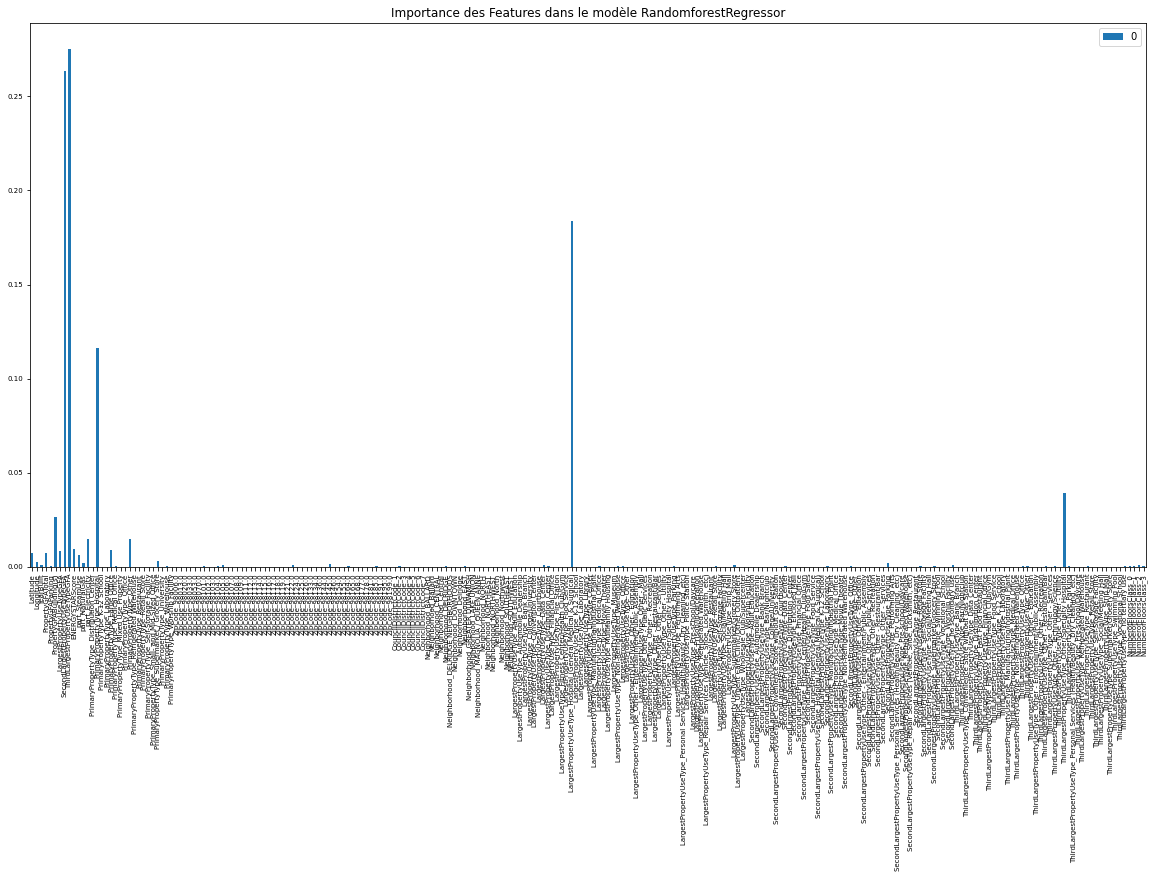

In [ ]:
pd.set_option('display.max_rows', 60)

plt.figure(figsize= (20,10))
pd.DataFrame(RFR_model.feature_importances_,
             index = df_X.columns).plot.bar(figsize= (20,10),
                                            fontsize=7,
                                            title ="Importance des Features dans le modèle RandomforestRegressor")

In [ ]:
features_rfr.columns=["feature_importance"]

In [ ]:
features_rfr.columns

Index(['feature_importance'], dtype='object')

In [ ]:
features_rfr.sort_values(by=["feature_importance"],ascending=False,inplace=True)
features_rfr.head(20)

,feature_importance
ThirdLargestPropertyUseTypeGFA,0.275332
SecondLargestPropertyUseTypeGFA,0.263765
LargestPropertyUseType_Hospital (General Medical & Surgical),0.183570
PrimaryPropertyType_Hospital,0.116396
ThirdLargestPropertyUseType_Other/Specialty Hospital,0.039129
PropertyGFABuilding(s),0.026304
part_Electricity,0.014623
PrimaryPropertyType_Other,0.014400
ENERGYSTARScore,0.009521
PrimaryPropertyType_Large Office,0.008546


In [ ]:
# création d'un dictionnaire des variables selectionnées selon leur nombre

d_feat_imp = {}
for i in range (1,240):
    d_feat_imp[i] = features_rfr.head(i).index.tolist()

In [ ]:
%%time
d_n_feat_imp_MAE = {}

for i in range (1,240):
    df_X,df_y= preprocessing_CO2(df_modelisation)
    df_X = df_X[d_feat_imp.get(i)]
    X = df_X.values
    y = df_y.values
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    RFR_model.fit(X_train,y_train)
    y_pred = RFR_model.predict(X_test)
    d_n_feat_imp_MAE[i] = mean_absolute_error(y_test, y_pred)

Wall time: 1min 12s


In [ ]:
# Quel est le nombre de variables pour lequel la MAE est minimale

n = min(d_n_feat_imp_MAE, key=d_n_feat_imp_MAE.get)
n

228

In [ ]:
# Quel est le nombre de variables pour les 10 MAE minimales

from operator import itemgetter
  
K = 10

res = dict(sorted(d_n_feat_imp_MAE.items(), key = itemgetter(1))[:K]) 

print(str(res)) 

{228: 102.10938281250003, 132: 108.654609375, 182: 109.00815885416664, 229: 109.96514843750002, 238: 111.06046093750001, 122: 112.59482812499999, 45: 113.58534635416665, 24: 114.65339583333333, 102: 115.63309114583335, 224: 116.11415625}


In [ ]:
# recupérons ne nombre de variable minimal sur ces 10 plus faibles valeurs de MAE
A = res.keys()
n = min(A)
n

24

Text(0, 0.5, 'Mean absolute error')

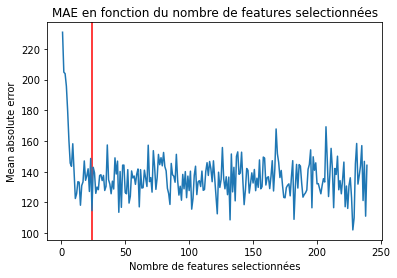

In [ ]:
plt.title("MAE en fonction du nombre de features selectionnées")
plt.axvline(x = n, color = "red", label = "Nbre de features selectionnées")
plt.plot(*zip(*sorted(d_n_feat_imp_MAE.items())))
plt.xlabel("Nombre de features selectionnées")
plt.ylabel("Mean absolute error")

In [ ]:
features_a_conserver_imp = features_rfr.head(n).index.tolist()
features_a_conserver_imp

['ThirdLargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'LargestPropertyUseType_Hospital (General Medical & Surgical)',
 'PrimaryPropertyType_Hospital',
 'ThirdLargestPropertyUseType_Other/Specialty Hospital',
 'PropertyGFABuilding(s)',
 'part_Electricity',
 'PrimaryPropertyType_Other',
 'ENERGYSTARScore',
 'PrimaryPropertyType_Large Office',
 'LargestPropertyUseTypeGFA',
 'PropertyGFATotal',
 'Latitude',
 'part_SteamUse',
 'PrimaryPropertyType_Supermarket / Grocery Store',
 'Longitude',
 'part_NaturalGas',
 'SecondLargestPropertyUseType_Parking',
 'ZipCode_98145.0',
 'YearBuilt',
 'LargestPropertyUseType_Supermarket/Grocery Store',
 'SecondLargestPropertyUseType_no secondary use',
 'ZipCode_98122.0',
 'ZipCode_98105.0']

In [ ]:
# Nous conserverons les features selectionnées

df_X,df_y= preprocessing_CO2(df_modelisation)
df_X = df_X[features_a_conserver_imp]
X = df_X.values
y = df_y.values


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
grid_RFR.fit(X_train,y_train)
RFR_model = grid_RFR.best_estimator_
RFR_model.fit(X_train,y_train)
y_pred = RFR_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

133.99433368055557
366114.32629935833
0.6536861702288816


In [ ]:
pd.DataFrame(y_test, y_pred)

,0
74.877667,61.25
56.720733,69.77
103.048000,39.06
101.912000,82.72
136.952667,168.88
...,...
32.825400,18.85
46.955467,48.76
86.546800,27.24
79.976867,106.45


In [ ]:
pd.DataFrame(y_test).describe()

,0
count,192.000000
mean,206.930156
std,1030.878246
min,0.810000
25%,14.330000
50%,39.940000
75%,94.627500
max,12307.160000


In [ ]:
pd.DataFrame(y_test, y_pred).reset_index().describe()

,index,0
count,192.000000,192.000000
mean,249.932857,206.930156
std,911.879075,1030.878246
min,4.418333,0.810000
25%,25.927783,14.330000
50%,56.323633,39.940000
75%,103.780233,94.627500
max,7498.099067,12307.160000


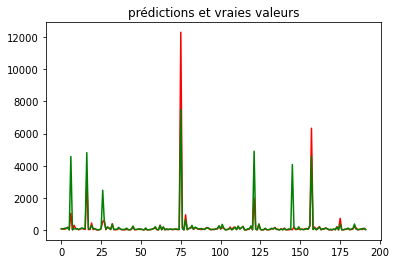

In [ ]:
plt.title("prédictions et vraies valeurs")
plt.plot(y_test, c='red')
plt.plot(y_pred, c='green')

##### Score des différents modeles apres feature selection model.feature_importance sur les modeles ayant cet attribut

In [ ]:
%%time
#ADA

df_X, df_y = preprocessing_CO2(df_modelisation)

X = df_X.values
y = df_y.values


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

grid_ADA.fit(X_train,y_train)
ADA_model = grid_ADA.best_estimator_
ADA_model.fit(X_train,y_train)

features_rfr = pd.DataFrame(ADA_model.feature_importances_, index = df_X.columns).sort_values(by = 0, ascending = False)

features_rfr.columns=["feature_importance"]
features_rfr.sort_values(by=["feature_importance"],ascending=False,inplace=True)

d_feat_imp = {}
for i in range (1,240):
    d_feat_imp[i] = features_rfr.head(i).index.tolist()

d_n_feat_imp_MAE = {}

for i in range (1,240):
    df_X,df_y= preprocessing_CO2(df_modelisation)
    df_X = df_X[d_feat_imp.get(i)]
    X = df_X.values
    y = df_y.values
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
#    grid_ADA.fit(X_train,y_train)
#    ADA_model = grid_ADA.best_estimator_
    ADA_model.fit(X_train,y_train)
    y_pred = ADA_model.predict(X_test)
    d_n_feat_imp_MAE[i] = mean_absolute_error(y_test, y_pred)
    
n = min(d_n_feat_imp_MAE, key=d_n_feat_imp_MAE.get)
    
features_a_conserver_imp = features_rfr.head(n).index.tolist()

df_X,df_y= preprocessing_CO2(df_modelisation)
df_X = df_X[features_a_conserver_imp]
X = df_X.values
y = df_y.values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

grid_ADA.fit(X_train,y_train)
ADA_model = grid_ADA.best_estimator_
y_pred_ADA = ADA_model.predict(X_test)

print("ADA MAE :" + str(mean_absolute_error(y_test, y_pred_ADA)))
print("ADA MSE :" +str(mean_squared_error(y_test, y_pred_ADA)))
print("ADA R2" +str(r2_score(y_test, y_pred_ADA)))


ADA MAE :166.91266317080436
ADA MSE :715011.6601507989
ADA R20.3236581893401246
Wall time: 42.8 s


In [ ]:
n

81

Text(0, 0.5, 'Mean absolute error')

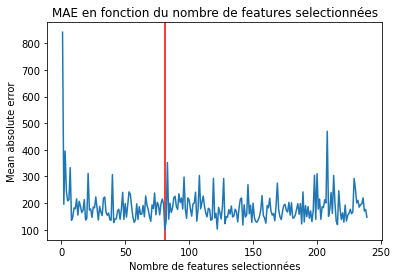

In [ ]:
plt.title("MAE en fonction du nombre de features selectionnées")
plt.axvline(x = n, color = "red", label = "Nbre de features selectionnées")
plt.plot(*zip(*sorted(d_n_feat_imp_MAE.items())))
plt.xlabel("Nombre de features selectionnées")
plt.ylabel("Mean absolute error")

In [ ]:
%%time
#GBR

df_X, df_y = preprocessing_CO2(df_modelisation)

X = df_X.values
y = df_y.values


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

grid_GBR.fit(X_train,y_train)
GBR_model = grid_GBR.best_estimator_
GBR_model.fit(X_train,y_train)

features_rfr = pd.DataFrame(GBR_model.feature_importances_, index = df_X.columns).sort_values(by = 0, ascending = False)
features_rfr.columns=["feature_importance"]
features_rfr.sort_values(by=["feature_importance"],ascending=False,inplace=True)

d_feat_imp = {}
for i in range (1,240):
    d_feat_imp[i] = features_rfr.head(i).index.tolist()

d_n_feat_imp_MAE = {}

for i in range (1,240):
    df_X,df_y= preprocessing_CO2(df_modelisation)
    df_X = df_X[d_feat_imp.get(i)]
    X = df_X.values
    y = df_y.values
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
#    grid_GBR.fit(X_train,y_train)
#    GBR_model = grid_GBR.best_estimator_
    GBR_model.fit(X_train,y_train)
    y_pred = GBR_model.predict(X_test)
    d_n_feat_imp_MAE[i] = mean_absolute_error(y_test, y_pred)
    
n = min(d_n_feat_imp_MAE, key=d_n_feat_imp_MAE.get)
    
features_a_conserver_imp = features_rfr.head(n).index.tolist()

df_X,df_y= preprocessing_CO2(df_modelisation)
df_X = df_X[features_a_conserver_imp]
X = df_X.values
y = df_y.values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

grid_GBR.fit(X_train,y_train)
GBR_model = grid_GBR.best_estimator_
y_pred_GB = GBR_model.predict(X_test)


print("GB MAE :" + str(mean_absolute_error(y_test, y_pred_GB)))
print("GB MSE :" +str(mean_squared_error(y_test, y_pred_GB)))
print("GB R2 :" +str(r2_score(y_test, y_pred_GB)))

overflow encountered in square


GB MAE :116.05667532381915
GB MSE :228479.40070542655
GB R2 :0.7838774104201316
Wall time: 33.9 s


overflow encountered in square


In [ ]:
n

5

Text(0, 0.5, 'Mean absolute error')

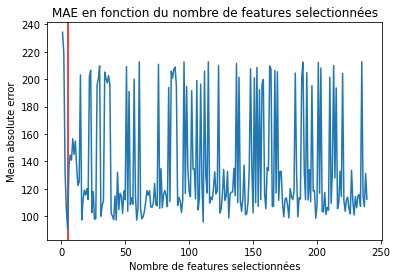

In [ ]:
plt.title("MAE en fonction du nombre de features selectionnées")
plt.axvline(x = n, color = "red", label = "Nbre de features selectionnées")
plt.plot(*zip(*sorted(d_n_feat_imp_MAE.items())))
plt.xlabel("Nombre de features selectionnées")
plt.ylabel("Mean absolute error")

In [ ]:
%%time
# XGB

df_X, df_y = preprocessing_CO2(df_modelisation)

X = df_X.values
y = df_y.values


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

grid_XGB.fit(X_train,y_train)
XGB_model = grid_XGB.best_estimator_
XGB_model.fit(X_train,y_train)


features_rfr = pd.DataFrame(XGB_model.feature_importances_, index = df_X.columns).sort_values(by = 0, ascending = False)

features_rfr.columns=["feature_importance"]
features_rfr.sort_values(by=["feature_importance"],ascending=False,inplace=True)

d_feat_imp = {}
for i in range (1,240):
    d_feat_imp[i] = features_rfr.head(i).index.tolist()

d_n_feat_imp_MAE = {}

for i in range (1,240):
    df_X,df_y= preprocessing_CO2(df_modelisation)
    df_X = df_X[d_feat_imp.get(i)]
    X = df_X.values
    y = df_y.values
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
#    grid_XGB.fit(X_train,y_train)
#    XGB_model = grid_XGB.best_estimator_
    XGB_model.fit(X_train,y_train)
    y_pred = XGB_model.predict(X_test)
    d_n_feat_imp_MAE[i] = mean_absolute_error(y_test, y_pred)
    
n = min(d_n_feat_imp_MAE, key=d_n_feat_imp_MAE.get)
    
features_a_conserver_imp = features_rfr.head(n).index.tolist()

df_X,df_y= preprocessing_CO2(df_modelisation)
df_X = df_X[features_a_conserver_imp]
X = df_X.values
y = df_y.values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

grid_XGB.fit(X_train,y_train)
XGB_model = grid_XGB.best_estimator_
#XGB_model.fit(X_train,y_train)
y_pred_XGB = XGB_model.predict(X_test)


print("XGB MAE :" + str(mean_absolute_error(y_test, y_pred_XGB)))
print("XGB MSE :" +str(mean_squared_error(y_test, y_pred_XGB)))
print("XGB R2 :" +str(r2_score(y_test, y_pred_XGB)))

XGB MAE :95.66528304570666
XGB MSE :197563.87672149568
XGB R2 :0.8131209355738064
Wall time: 9min 43s


In [ ]:
n

84

Text(0, 0.5, 'Mean absolute error')

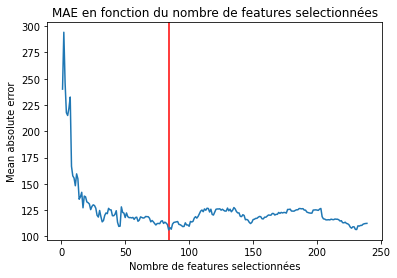

In [ ]:
plt.title("MAE en fonction du nombre de features selectionnées")
plt.axvline(x = n, color = "red", label = "Nbre de features selectionnées")
plt.plot(*zip(*sorted(d_n_feat_imp_MAE.items())))
plt.xlabel("Nombre de features selectionnées")
plt.ylabel("Mean absolute error")

In [ ]:
%%time


print("ADA MAE :" + str(mean_absolute_error(y_test, y_pred_ADA)))
print("ADA MSE :" +str(mean_squared_error(y_test, y_pred_ADA)))
print("ADA R2" +str(r2_score(y_test, y_pred_ADA)))

print("GB MAE :" + str(mean_absolute_error(y_test, y_pred_GB)))
print("GB MSE :" +str(mean_squared_error(y_test, y_pred_GB)))
print("GB R2 :" +str(r2_score(y_test, y_pred_GB)))

print("XGB MAE :" + str(mean_absolute_error(y_test, y_pred_XGB)))
print("XGB MSE :" +str(mean_squared_error(y_test, y_pred_XGB)))
print("XGB R2 :" +str(r2_score(y_test, y_pred_XGB)))

ADA MAE :166.91266317080436
ADA MSE :715011.6601507989
ADA R20.3236581893401246
GB MAE :116.05667532381915
GB MSE :228479.40070542655
GB R2 :0.7838774104201316
XGB MAE :95.66528304570666
XGB MSE :197563.87672149568
XGB R2 :0.8131209355738064
Wall time: 5.04 ms


#### Shap

In [ ]:
df_X,df_y= preprocessing_CO2(df_modelisation)
df_X = df_X
X = df_X.values
y = df_y.values


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
grid_RFR.fit(X_train,y_train)
RFR_model = grid_RFR.best_estimator_
RFR_model.fit(X_train,y_train)
y_pred = RFR_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

137.6493291666666
429481.41977372207
0.5937461480932065


In [ ]:
shap.initjs()

In [ ]:
#TreeExplainer, TreeGainExplainer, TreeMapleExplainer 

In [ ]:
X_test_shap = pd.DataFrame(X_test, columns = df_X.columns)

In [ ]:
tree_explainer1 = shap.TreeExplainer(RFR_model)

#### Shap global

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


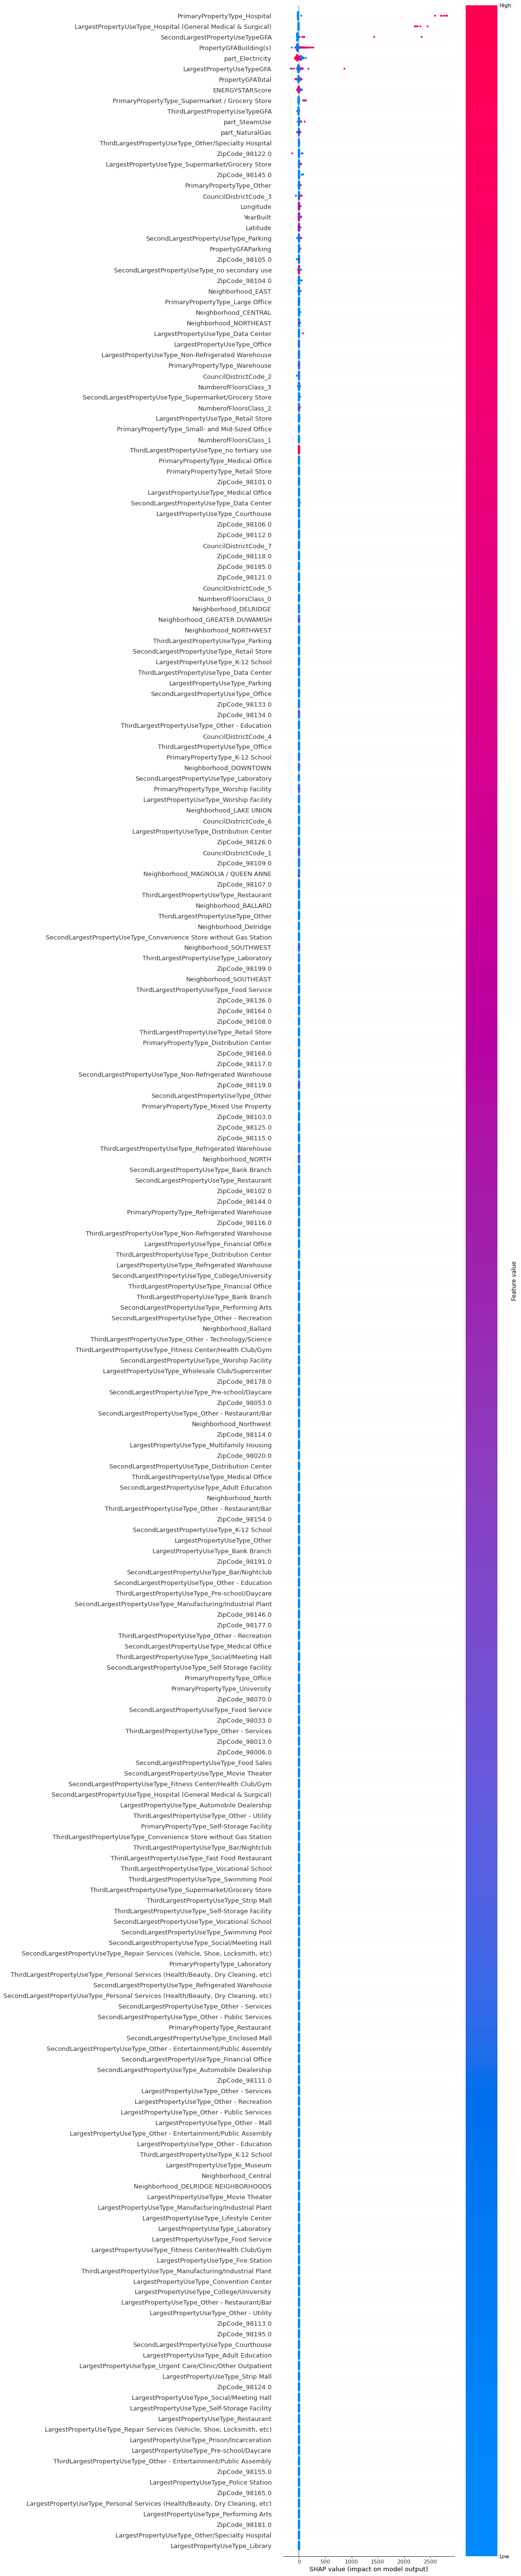

In [ ]:
shap_values = tree_explainer1.shap_values(X_test_shap)
shap.summary_plot(shap_values, X_test_shap, max_display = 300)

##### Selection des features par shap

In [ ]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_test_shap.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance.head(20)

,col_name,feature_importance_vals
14,PrimaryPropertyType_Hospital,100.990635
116,LargestPropertyUseType_Hospital (General Medic...,82.379752
7,SecondLargestPropertyUseTypeGFA,49.854179
5,PropertyGFABuilding(s),39.558765
12,part_Electricity,37.243787
6,LargestPropertyUseTypeGFA,22.397979
3,PropertyGFATotal,13.579142
9,ENERGYSTARScore,11.697626
27,PrimaryPropertyType_Supermarket / Grocery Store,7.957188
8,ThirdLargestPropertyUseTypeGFA,6.852856


In [ ]:
feature_importance.shape

(240, 2)

In [ ]:
# création d'un dictionnaire des variables selectionnées selon leur nombre

d_feat_shap = {}
for i in range (1,240):
    d_feat_shap[i] = feature_importance["col_name"].head(i).tolist()

In [ ]:
d_n_feat_shap_MAE = {}

for i in range (1,240):
    df_X,df_y= preprocessing_CO2(df_modelisation)
    df_X = df_X[d_feat_shap.get(i)]
    X = df_X.values
    y = df_y.values
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    RFR_model.fit(X_train,y_train)
    y_pred = RFR_model.predict(X_test)
    d_n_feat_shap_MAE[i] = mean_absolute_error(y_test, y_pred)

In [ ]:
# Quel est le nombre de variables pour lequel la MAE est minimale

n = min(d_n_feat_shap_MAE, key=d_n_feat_shap_MAE.get)
n

11

In [ ]:
# Quel est le nombre de variables pour les 10 MAE minimales

from operator import itemgetter
  
K = 10

res = dict(sorted(d_n_feat_shap_MAE.items(), key = itemgetter(1))[:K]) 

print(str(res)) 

{11: 113.76669479166667, 72: 115.28609062499997, 190: 115.91757187499998, 30: 117.36924270833329, 211: 118.2317677083333, 170: 120.2810260416666, 38: 120.83542499999994, 102: 121.61064999999996, 19: 121.81496874999998, 154: 122.10425937499996}


In [ ]:
# recupérons ne nombre de variable minimal sur ces 10 plus faibles valeurs de MAE
A = res.keys()
n = min(A)
n

11

Text(0, 0.5, 'Mean absolute error')

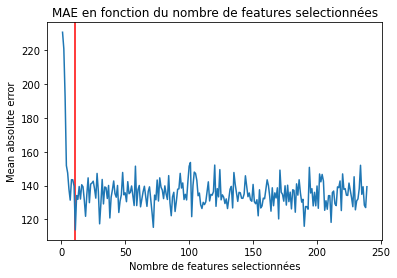

In [ ]:
plt.title("MAE en fonction du nombre de features selectionnées")
plt.axvline(x = n, color = "red", label = "Nbre de features selectionnées")
plt.plot(*zip(*sorted(d_n_feat_shap_MAE.items())))
plt.xlabel("Nombre de features selectionnées")
plt.ylabel("Mean absolute error")

In [ ]:
features_a_conserver_shap = feature_importance["col_name"].head(n).tolist()
features_a_conserver_shap

['PrimaryPropertyType_Hospital',
 'LargestPropertyUseType_Hospital (General Medical & Surgical)',
 'SecondLargestPropertyUseTypeGFA',
 'PropertyGFABuilding(s)',
 'part_Electricity',
 'LargestPropertyUseTypeGFA',
 'PropertyGFATotal',
 'ENERGYSTARScore',
 'PrimaryPropertyType_Supermarket / Grocery Store',
 'ThirdLargestPropertyUseTypeGFA',
 'part_SteamUse']

##### Modele random forest regressor avec features shap

In [ ]:
df_X,df_y= preprocessing_CO2(df_modelisation)
df_X = df_X[features_a_conserver_shap]
X = df_X.values
y = df_y.values


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
grid_RFR.fit(X_train,y_train)
RFR_model = grid_RFR.best_estimator_
RFR_model.fit(X_train,y_train)
y_pred = RFR_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

135.4409348958334
385469.06098767975
0.635378194242616


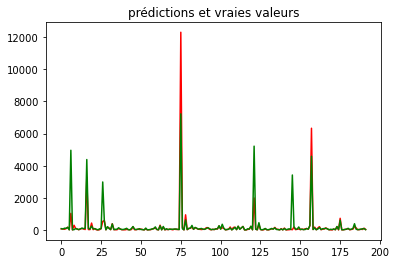

In [ ]:
plt.title("prédictions et vraies valeurs")
plt.plot(y_test, c='red')
plt.plot(y_pred, c='green')

In [ ]:
pd.DataFrame(y_test).describe()

,0
count,192.000000
mean,206.930156
std,1030.878246
min,0.810000
25%,14.330000
50%,39.940000
75%,94.627500
max,12307.160000


#### Comparaison avec modeles naïf

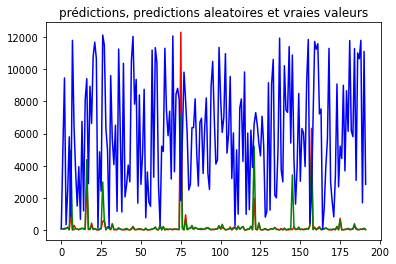

In [ ]:
y_pred_random = np.random.uniform(np.min(y_test),np.max(y_test),y_test.shape)

plt.title("prédictions, predictions aleatoires et vraies valeurs")
plt.plot(y_test, c='red')
plt.plot(y_pred, c='green')
plt.plot(y_pred_random, c='blue')

In [ ]:
print(mean_absolute_error(y_test, y_pred_random))
print(mean_squared_error(y_test, y_pred_random))
print(r2_score(y_test, y_pred_random))

5908.74805480201
46974258.64037948
-43.43375809639104


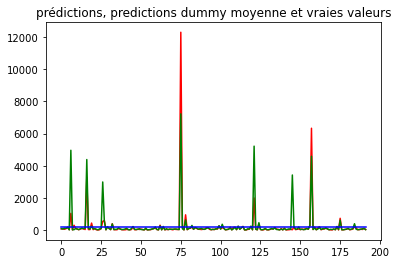

In [ ]:
dummy_reg = DummyRegressor(strategy = 'mean')
dummy_reg.fit(X_train,y_train)
y_pred_dummy_reg = dummy_reg.predict(X_test)


plt.title("prédictions, predictions dummy moyenne et vraies valeurs")
plt.plot(y_test, c='red')
plt.plot(y_pred, c='green')
plt.plot(y_pred_dummy_reg, c='blue')

In [ ]:
print(mean_absolute_error(y_test, y_pred_dummy_reg))
print(mean_squared_error(y_test, y_pred_dummy_reg))
print(r2_score(y_test, y_pred_dummy_reg))

243.89690385973492
1059318.590886321
-0.002027650394704761


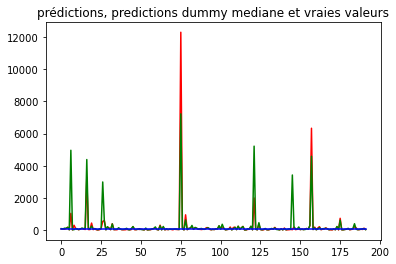

In [ ]:
dummy_reg = DummyRegressor(strategy = 'median')
dummy_reg.fit(X_train,y_train)
y_pred_dummy_reg = dummy_reg.predict(X_test)



plt.title("prédictions, predictions dummy mediane et vraies valeurs")
plt.plot(y_test, c='red')
plt.plot(y_pred, c='green')
plt.plot(y_pred_dummy_reg, c='blue')

In [ ]:
print(mean_absolute_error(y_test, y_pred_dummy_reg))
print(mean_squared_error(y_test, y_pred_dummy_reg))
print(r2_score(y_test, y_pred_dummy_reg))

189.73880208333333
1082919.2622015625
-0.024351930766262075


# Modele selectionné : XGBOOST avec feature selection

In [ ]:
print("XGB MAE :" + str(mean_absolute_error(y_test, y_pred_XGB)))
print("XGB MSE :" +str(mean_squared_error(y_test, y_pred_XGB)))
print("XGB R2 :" +str(r2_score(y_test, y_pred_XGB)))

XGB MAE :95.66528304570666
XGB MSE :197563.87672149568
XGB R2 :0.8131209355738064


In [ ]:
pd.DataFrame(y_test).describe()

,0
count,192.000000
mean,206.930156
std,1030.878246
min,0.810000
25%,14.330000
50%,39.940000
75%,94.627500
max,12307.160000


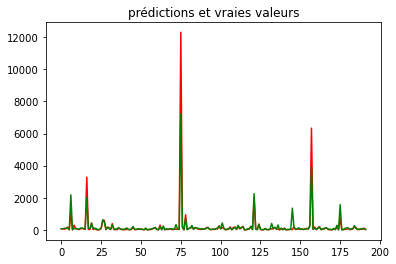

In [ ]:
plt.title("prédictions et vraies valeurs")
plt.plot(y_test, c='red')
plt.plot(y_pred_XGB, c='green')

In [ ]:
pd.DataFrame(y_test, y_pred_XGB)

,0
71.062393,61.25
66.922562,69.77
96.126602,39.06
104.506638,82.72
106.483177,168.88
...,...
48.139202,18.85
57.246460,48.76
79.743797,27.24
70.148483,106.45


#### Comparaison avec modeles naïf

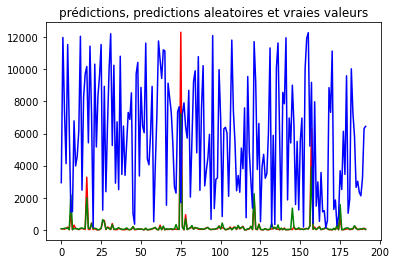

In [ ]:
y_pred_random = np.random.uniform(np.min(y_test),np.max(y_test),y_test.shape)

plt.title("prédictions, predictions aleatoires et vraies valeurs")
plt.plot(y_test, c='red')
plt.plot(y_pred_XGB, c='green')
plt.plot(y_pred_random, c='blue')

In [ ]:
print(mean_absolute_error(y_test, y_pred_random))
print(mean_squared_error(y_test, y_pred_random))
print(r2_score(y_test, y_pred_random))

5670.3015482842575
44495896.76476495
-41.08943302892289


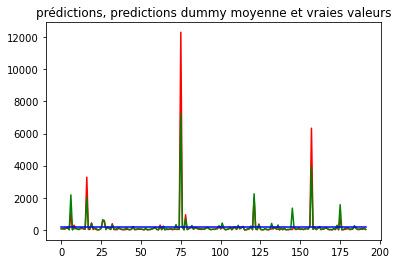

In [ ]:
dummy_reg = DummyRegressor(strategy = 'mean')
dummy_reg.fit(X_train,y_train)
y_pred_dummy_reg = dummy_reg.predict(X_test)


plt.title("prédictions, predictions dummy moyenne et vraies valeurs")
plt.plot(y_test, c='red')
plt.plot(y_pred_XGB, c='green')
plt.plot(y_pred_dummy_reg, c='blue')

In [ ]:
print(mean_absolute_error(y_test, y_pred_dummy_reg))
print(mean_squared_error(y_test, y_pred_dummy_reg))
print(r2_score(y_test, y_pred_dummy_reg))

243.89690385973492
1059318.590886321
-0.002027650394704761


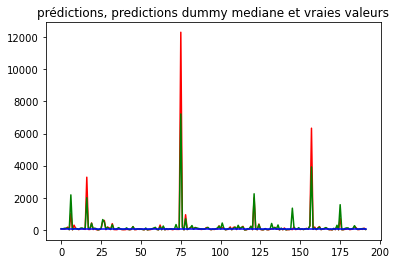

In [ ]:
dummy_reg = DummyRegressor(strategy = 'median')
dummy_reg.fit(X_train,y_train)
y_pred_dummy_reg = dummy_reg.predict(X_test)



plt.title("prédictions, predictions dummy mediane et vraies valeurs")
plt.plot(y_test, c='red')
plt.plot(y_pred_XGB, c='green')
plt.plot(y_pred_dummy_reg, c='blue')

In [ ]:
print(mean_absolute_error(y_test, y_pred_dummy_reg))
print(mean_squared_error(y_test, y_pred_dummy_reg))
print(r2_score(y_test, y_pred_dummy_reg))

189.73880208333333
1082919.2622015625
-0.024351930766262075
